<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week15/Day4/Exercises_Week15Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌟 Exercise 1: Calculating Required Sample Size

In [1]:
!pip install statsmodels

from statsmodels.stats.power import NormalIndPower

In [2]:
# Initialize the power analysis object
analysis = NormalIndPower()

# Parameters
effect_size = 0.3    # Cohen's h
alpha = 0.05         # Significance level
power = 0.8          # Desired power

In [3]:
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Required sample size per group: {round(sample_size)}")

Required sample size per group: 174


🌟 Exercise 2: Effect Size vs Sample Size

In [4]:
effect_sizes = [0.2, 0.4, 0.5]
sample_sizes = []

for es in effect_sizes:
    ss = analysis.solve_power(effect_size=es, power=power, alpha=alpha, ratio=1, alternative='two-sided')
    sample_sizes.append(round(ss))

for es, ss in zip(effect_sizes, sample_sizes):
    print(f"Effect size {es} → Required sample size per group: {ss}")

Effect size 0.2 → Required sample size per group: 392
Effect size 0.4 → Required sample size per group: 98
Effect size 0.5 → Required sample size per group: 63


🎓 Conclusion:
	•	As the effect size increases, the required sample size decreases.
	•	Why?
A larger effect is easier to detect, so you need fewer participants to distinguish it from random noise. Conversely, detecting a small effect requires more data to overcome natural variation and achieve statistical significance.

🌟 Exercise 3: Exploring the Impact of Statistical Power

In [5]:
# Define the power levels to test
power_levels = [0.7, 0.8, 0.9]
effect_size = 0.2
sample_sizes = []

for p in power_levels:
    ss = analysis.solve_power(effect_size=effect_size, power=p, alpha=alpha, ratio=1, alternative='two-sided')
    sample_sizes.append(round(ss))

# Print results
for p, ss in zip(power_levels, sample_sizes):
    print(f"Power {p} → Required sample size per group: {ss}")

Power 0.7 → Required sample size per group: 309
Power 0.8 → Required sample size per group: 392
Power 0.9 → Required sample size per group: 525


📘 Conclusion:
	•	Higher power ⇒ Larger sample size
	•	This happens because higher power means a lower chance of false negatives (Type II error), so:
	•	You need more participants to be confident that you’ll detect the true effect.
	•	A good rule:
	•	Power = 0.8 (80%) is standard.
	•	Power > 0.9 is used in critical experiments (e.g. medicine).

🌟 Exercise 4: Implementing Sequential Testing

**Stopping criteria:**

🔁 Weekly monitoring
🛑 Stop early **if p-value < 0.01** in any week (stricter threshold than usual 0.05)
✔️ This helps avoid false positives due to repeated testing

In [6]:
from scipy.stats import ttest_ind

# Example: simulated weekly p-values (replace with real data)
weekly_p_values = [0.12, 0.07, 0.02]

for week, p in enumerate(weekly_p_values, start=1):
    print(f"Week {week} → p-value: {p}")
    if p < 0.01:
        print("🛑 Stop the test early! Statistically significant difference detected.")
        break
else:
    print("📊 Continue test. No early stopping condition met.")

Week 1 → p-value: 0.12
Week 2 → p-value: 0.07
Week 3 → p-value: 0.02
📊 Continue test. No early stopping condition met.


At week 3, the p-value is 0.02. Since our early stopping threshold is 0.01 to avoid Type I error from repeated tests, we should NOT stop the test yet. The test should continue until we meet the stricter early stopping condition or reach the planned test duration.

🌟 Exercise 5: Applying Bayesian A/B Testing

🎯 Prior: 50% chance the new feature is better (neutral prior).

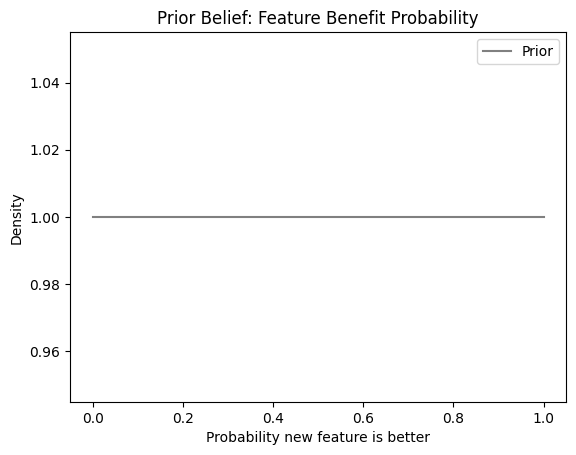

In [7]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Prior: Beta(1, 1) → uniform (no bias)
a_prior, b_prior = 1, 1

x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a_prior, b_prior), label='Prior', color='gray')
plt.title("Prior Belief: Feature Benefit Probability")
plt.xlabel("Probability new feature is better")
plt.ylabel("Density")
plt.legend()
plt.show()

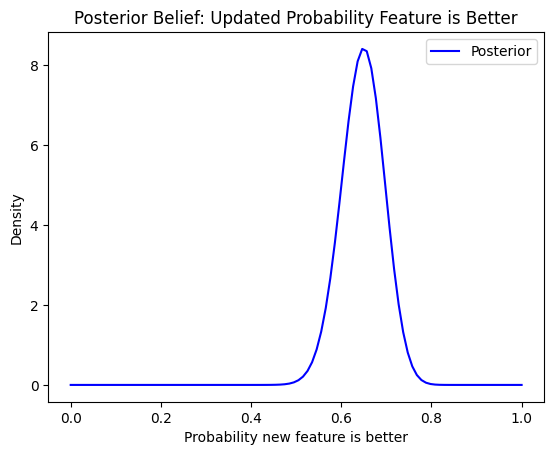

In [8]:
# Update with data: 65 successes, 35 failures
a_post = a_prior + 65
b_post = b_prior + 35

# Plot posterior
plt.plot(x, beta.pdf(x, a_post, b_post), label='Posterior', color='blue')
plt.title("Posterior Belief: Updated Probability Feature is Better")
plt.xlabel("Probability new feature is better")
plt.ylabel("Density")
plt.legend()
plt.show()

**➕ If Posterior = 65%:**

🔎 You are somewhat confident the new feature is better, but not enough.
📉 A common decision threshold is **>90% or >95%**.
❌ 65% is **not strong enough** to confidently roll out the feature.

**➕ If Posterior = 55%:**

😐 Very weak evidence.
🚫 Definitely not enough to act.
🧪 Keep testing or collect more data.

**✅ Final Summary:**

🎯 Prior: 50% chance new feature improves engagement (neutral belief).
📊 After data: Posterior = 65% → modest confidence, but not enough to make a decision.
🧠 If posterior was 90%+, you might consider rolling out. At 65% or 55%, it’s best to continue testing or collect more evidence.

🌟 Exercise 6: Implementing Adaptive Experimentation

In [9]:
traffic_allocation = {
    "Layout A": 0.2,
    "Layout B": 0.2,
    "Layout C": 0.6
}

In [10]:
# New allocation if Layout B catches up:
traffic_allocation = {
    "Layout A": 0.1,
    "Layout B": 0.4,
    "Layout C": 0.5
}

🎯 Initially assign equal traffic (33%).


---


📊 After Week 1, shift more traffic to Layout C based on performance.


---


🔄 Continue adapting weekly.


---


⚖️ Balance exploration (test others) and exploitation (send more to top layout).


---


⚠️ Watch for early bias, small sample sizes, and overreaction to noise.


---




